# Проект АНО Рак победим

In [1]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from tqdm import tqdm
tqdm.pandas()
import re
import matplotlib.pyplot as plt
import roman

In [2]:
# загружаем датафрейм для работы
forms = pd.read_excel('/Users/daria/Documents/venv/Анкеты_до_30_11_2023_new_data_1.xlsx')

In [3]:
display(forms.head())

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как у знали,Дата заполнения анкеты,requestid,sent,referer,Form name
0,User_01_01,Email_0001,tel_number_0001,1969-11-15,Краснодар Краснодарский край,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,Знакомые,2021-10-21,3284862:2572982821,2021-10-21 12:02:08,http://rak-pobedim.com/anketa,Анкета участника
1,User_01_02,Email_0002,tel_number_0002,1982-08-20,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,NaN,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы орган...,Интернет,2021-10-21,3284862:2575517051,2021-10-21 21:14:37,http://rak-pobedim.com/anketa,Анкета участника
2,User_01_03,Email_0003,tel_number_0003,1976-06-09,Сургут ХМАО,Пенсионер инвалид 3 гр,Рак шейки матки 3 С стадии,Лучевая терапия,Денежную. На лучевую ехать в другой город. Жил...,Клуб “Рак Победим”,Интернет,2021-10-22,3284862:2579157551,2021-10-22 16:32:42,http://rak-pobedim.com/anketa,Анкета участника
3,User_01_04,Email_0004,tel_number_0004,1960-12-19,Ростов-на-Дону,Медицина,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяц...",Принимаю гармон и прохожу раз в год полное обс...,"Уверенность и избавиться от страхов , полезную...",#ЛовлюЭмоции; Клуб “Рак Победим”; Дари Эмоции,Знакомые,2021-10-22,3284862:2579657471,2021-10-22 18:25:24,http://rak-pobedim.com/anketa,Анкета участника
4,User_01_05,Email_0005,tel_number_0005,1967-07-09,Нижний Новгород Нижегородская область,Менеджер по туризму,"РМЖ, 2 а",Гормонотерапия,NaN,#ЛовлюЭмоции; Клуб “Рак Победим”,Интернет,2021-10-24,3284862:2589075031,2021-10-24 23:49:52,http://rak-pobedim.com/anketa,Анкета участника


In [4]:
forms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ФИО                     1568 non-null   object        
 1   Email                   1423 non-null   object        
 2   Телефон                 1568 non-null   object        
 3   Дата рождения           1493 non-null   datetime64[ns]
 4   Город                   1565 non-null   object        
 5   Сфера деятельности      1377 non-null   object        
 6   Диагноз                 1566 non-null   object        
 7   Этап                    1542 non-null   object        
 8   Помощь                  780 non-null    object        
 9   Группы                  1549 non-null   object        
 10  Как у знали             1520 non-null   object        
 11  Дата заполнения анкеты  1557 non-null   datetime64[ns]
 12  requestid               1568 non-null   object  

**Вывод**             
Мы познакомились с данными от заказчика о подопечных фонда и о донорах фонда.

В датафрейме forms 1568  строк, от 0 до 1567 и 16 столбцов.             
В столбцах: Email, Дата рождения, Город, Сфера деятельности, Диагноз, Этап, Помощь, Группы, Как у знали, Дата заполнения анкеты, Form name - есть пропуски.            
Во всех столбцах указан верный тип данных.            

В датафрейме donator 581  строк, от 0 до 580 и 10 столбцов.            
Во всех столбцах нет пропусков.             
В столбце "Дата пожертвования" указан неверный тип данных.             

**План по предобработке данных:**             
1 часть:              
    - поправим название столбца "как у знали",             
    - изменим тип данных в столбце "Дата пожертвования",             
    - обработаем пропуски.              
2 часть:              
    - добавим столбцы с очищенными данными для дальнейшей работы: 'sity', 'activity', 'diagnosis', 'steps', 'help' из соответствующих столбцов:   'Город', 'Сфера деятельности', 'Диагноз', 'Этап', 'Помощь'

## Предобработка данных

### 1 часть

In [5]:
# поправим название столбца "как у знали",             
forms.rename(columns={'Как у знали': 'Как узнали'}, inplace=True)

In [6]:
# работаем с пропусками в forms, заполняем их 'Не указано'             
columns_to_fill = ['Email', 'Город', 'Сфера деятельности', 'Диагноз', 'Этап', 'Помощь', 'Группы', 
                   'Как узнали', 'Form name']
forms[columns_to_fill] = forms[columns_to_fill].fillna('Не указано')

In [7]:
forms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ФИО                     1568 non-null   object        
 1   Email                   1568 non-null   object        
 2   Телефон                 1568 non-null   object        
 3   Дата рождения           1493 non-null   datetime64[ns]
 4   Город                   1568 non-null   object        
 5   Сфера деятельности      1568 non-null   object        
 6   Диагноз                 1568 non-null   object        
 7   Этап                    1568 non-null   object        
 8   Помощь                  1568 non-null   object        
 9   Группы                  1568 non-null   object        
 10  Как узнали              1568 non-null   object        
 11  Дата заполнения анкеты  1557 non-null   datetime64[ns]
 12  requestid               1568 non-null   object  

### 2 часть

**Работаем со столбцом "Город"**

In [8]:
# загрузим справочник с названиями городов 
cities = pd.read_excel('/Users/daria/Documents/venv/Справочники для проекта Рак Победим.xlsx', sheet_name='Города')
cities.head()

,id,name,type,region,coords
0,1,Красный Сулин,город,Ростовская область,"[47.8815133907,40.0553169561]"
1,2,Сальск,город,Ростовская область,"[46.480396424,41.5374105563]"
2,3,Дигора,город,Республика Северная Осетия-Алания,"[43.1571481495,44.1545996296]"
3,4,Моздок,город,Республика Северная Осетия-Алания,"[43.7866865572,44.5958897793]"
4,5,Ардон,город,Республика Северная Осетия-Алания,"[43.1742767421,44.2909920696]"


In [9]:
# переведем значения столбца 'name' в список
city = cities['name'].to_list()

In [10]:
forms['Город'].head()

0             Краснодар Краснодарский край
1                г. Пушкин Санкт-Петербург
2                              Сургут ХМАО
3                           Ростов-на-Дону
4    Нижний Новгород Нижегородская область
Name: Город, dtype: object

In [11]:
# функция для удаления "край" или "область" из описания города 
def remove_region(text):
    words = text.split()  # Разбиваем строку на слова
    new_words = []
    skip_next = False  # Флаг для пропуска следующего слова, если предыдущее слово было "край" или "область"
    for i, word in enumerate(words):
        if skip_next:
            skip_next = False
            continue
        if word.lower() in ['край', 'область']:  # Проверяем, является ли текущее слово "край" или "область"
            if i > 0:  # Убеждаемся, что есть предыдущее слово
                del new_words[-1]  # Удаляем предыдущее слово из нового списка
            skip_next = True
            continue
        new_words.append(word)  # Добавляем слово в новый список
    return ' '.join(new_words)  # Собираем новую строку из списка слов

forms['Город'] = forms['Город'].apply(remove_region)

In [12]:
forms['Город'].head()

0                    Краснодар
1    г. Пушкин Санкт-Петербург
2                  Сургут ХМАО
3               Ростов-на-Дону
4              Нижний Новгород
Name: Город, dtype: object

In [13]:
forms.loc[forms['Город'] == '']

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как узнали,Дата заполнения анкеты,requestid,sent,referer,Form name
534,User_01_535,Не указано,tel_number_0535,1968-08-09,,Не указано,РМЖ,Ремиссия,Не указано,#ЛовлюЭмоции; Рак Победим РМЖ,Интернет,2022-11-18,3284862:3988522351,2022-11-18 12:32:29,http://rak-pobedim.com/anketa,Анкета участника
544,User_01_545,Email_0545,tel_number_0545,1963-02-19,,Пенсионер,"РМЖ, 3 стадия",Ремиссия,Эмоциональную,#ЛовлюЭмоции; Дари Эмоции,Знакомые,2022-11-19,3284862:3993016551,2022-11-19 16:20:01,http://rak-pobedim.com/anketa,Анкета участника
562,User_01_563,Email_0563,tel_number_0563,1973-06-24,,Медсестра,РМЖ 2 стадия,П/операции,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”,Интернет,2022-11-29,3284862:4032025731,2022-11-29 15:49:02,http://rak-pobedim.com/anketa,Анкета участника
771,User_01_772,Email_0772,tel_number_0772,1966-08-08,,Начальник участка завода,"РМЖ, ст.2б,НЕR2 позитивный",Таргеты,Не указано,Рак Победим РМЖ,Интернет,2023-05-13,3284862:4662425441,2023-05-13 22:06:53,http://rak-pobedim.com/anketa,Анкета участника
833,User_01_834,Email_0834,tel_number_0834,1979-05-11,,Не указано,"РМЖ, 3ст",Лечение,Не указано,Рак Победим РМЖ,Знакомые,2023-06-22,3284862:4815244641,2023-06-22 21:49:09,http://rak-pobedim.com/anketa,Анкета участника
1246,User_01_1247,Не указано,tel_number_1247,1981-09-10,,Дома сижу,РМЖ 4 стадия,"Химия, операция.",Общие,Движение #ловлюэмоции; Клуб Рак победим; Дари ...,Знакомые,2021-03-25,3284862:1779137471,2021-03-25 15:25:27,http://rak-pobedim.com/anketa,Анкета участника
1328,User_01_1329,Email_1329,tel_number_1329,1982-03-11,,Товаровед,РМЖ 2 стадия,Химиотерапия и лучи,Совет,Клуб Рак победим,Знакомые,2021-04-28,3284862:1908072561,2021-04-28 21:10:10,http://rak-pobedim.com/anketa,Анкета участника
1333,User_01_1334,Email_1334,tel_number_1334,1981-09-09,,"Раньше вела мероприятия свадьбы,юбилеи",Рак поджелудочной железы 4 ст,Химиотерапия,"Общение,консультация врача",Движение #ловлюэмоции; Клуб Рак победим; Анонс...,Знакомые,2021-05-01,3284862:1916174051,2021-05-01 11:03:14,http://rak-pobedim.com/anketa,Анкета участника
1557,User_01_1558,Email_1558,tel_number_1558,1993-07-25,,Домохозяйка,Меланома mts в лимфоузлы,Иммунотерапия,Не указано,Движение #ловлюэмоции; Клуб Рак победим; Анонс...,Интернет,2021-10-07,3284862:2513476201,2021-10-07 16:38:08,http://rak-pobedim.com/anketa,Анкета участника


In [14]:
forms.loc[forms['Город'] == '']

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как узнали,Дата заполнения анкеты,requestid,sent,referer,Form name
534,User_01_535,Не указано,tel_number_0535,1968-08-09,,Не указано,РМЖ,Ремиссия,Не указано,#ЛовлюЭмоции; Рак Победим РМЖ,Интернет,2022-11-18,3284862:3988522351,2022-11-18 12:32:29,http://rak-pobedim.com/anketa,Анкета участника
544,User_01_545,Email_0545,tel_number_0545,1963-02-19,,Пенсионер,"РМЖ, 3 стадия",Ремиссия,Эмоциональную,#ЛовлюЭмоции; Дари Эмоции,Знакомые,2022-11-19,3284862:3993016551,2022-11-19 16:20:01,http://rak-pobedim.com/anketa,Анкета участника
562,User_01_563,Email_0563,tel_number_0563,1973-06-24,,Медсестра,РМЖ 2 стадия,П/операции,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”,Интернет,2022-11-29,3284862:4032025731,2022-11-29 15:49:02,http://rak-pobedim.com/anketa,Анкета участника
771,User_01_772,Email_0772,tel_number_0772,1966-08-08,,Начальник участка завода,"РМЖ, ст.2б,НЕR2 позитивный",Таргеты,Не указано,Рак Победим РМЖ,Интернет,2023-05-13,3284862:4662425441,2023-05-13 22:06:53,http://rak-pobedim.com/anketa,Анкета участника
833,User_01_834,Email_0834,tel_number_0834,1979-05-11,,Не указано,"РМЖ, 3ст",Лечение,Не указано,Рак Победим РМЖ,Знакомые,2023-06-22,3284862:4815244641,2023-06-22 21:49:09,http://rak-pobedim.com/anketa,Анкета участника
1246,User_01_1247,Не указано,tel_number_1247,1981-09-10,,Дома сижу,РМЖ 4 стадия,"Химия, операция.",Общие,Движение #ловлюэмоции; Клуб Рак победим; Дари ...,Знакомые,2021-03-25,3284862:1779137471,2021-03-25 15:25:27,http://rak-pobedim.com/anketa,Анкета участника
1328,User_01_1329,Email_1329,tel_number_1329,1982-03-11,,Товаровед,РМЖ 2 стадия,Химиотерапия и лучи,Совет,Клуб Рак победим,Знакомые,2021-04-28,3284862:1908072561,2021-04-28 21:10:10,http://rak-pobedim.com/anketa,Анкета участника
1333,User_01_1334,Email_1334,tel_number_1334,1981-09-09,,"Раньше вела мероприятия свадьбы,юбилеи",Рак поджелудочной железы 4 ст,Химиотерапия,"Общение,консультация врача",Движение #ловлюэмоции; Клуб Рак победим; Анонс...,Знакомые,2021-05-01,3284862:1916174051,2021-05-01 11:03:14,http://rak-pobedim.com/anketa,Анкета участника
1557,User_01_1558,Email_1558,tel_number_1558,1993-07-25,,Домохозяйка,Меланома mts в лимфоузлы,Иммунотерапия,Не указано,Движение #ловлюэмоции; Клуб Рак победим; Анонс...,Интернет,2021-10-07,3284862:2513476201,2021-10-07 16:38:08,http://rak-pobedim.com/anketa,Анкета участника


In [15]:
# после удаления слов край или область образовались пропуски - заполним их на "не указано"
forms.loc[forms['Город'] == '', 'Город'] = 'Не указано'

In [16]:
# добавляем в основной датафрейм столбцы 'city' и 'city_score', 
# применим функцию extractOne к каждому значению в столбце 'Город', 
# для поиска наилучшего совпадения с заданным шаблоном в списке city 
forms[['city', 'city_score']] = forms['Город'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|███████████████████████████████████████| 1568/1568 [01:15<00:00, 20.66it/s]


In [17]:
pd.set_option('display.max_rows', 200)

forms[['Город', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

,Город,city,city_score
187,Вена Австрия,Аша,60
153,Диярбакыр Турция,Дигора,60
1026,Пехларн Австрия,Беслан,60
815,с. Зильбачи Дагестан,Ачинск,62
1141,п. Энергетик,Нерехта,64
631,"Казань проспект победы 139 а корпус 1 кв 95, 1...",Назрань,64
1355,Орша Белорусия,Орск,64
1340,п. Приютово Башкортостан,Котовск,64
667,район х.Сухой,Сухой Лог,67
743,Тугулым,Бугульма,67


In [18]:
# функция сработала не идеально, сделаем дополнительный список значений
extra = ['Турция', 'Австрия', 'Эстония', 'Латвия', 'Беларусь', 'Казахстан', 'Киргизия','Северный Кипр', 'Белорусь',
         'Великобретания', 'Украина', 'Германия', 'Молдавия', 'Абхазия', 'Канада', 'Таджикистан', 
         'с. Зильбачи','п. Приютово','п. Энергетик', 'х.Сухой', 'п. Трусово', 'п. Тугулым', 'р.п. Шаховская', 
         'Антрацит', 'ст.Бузиновская', 'Заплавное', 'с. Кваркено', 'Макеевка', 'ст Ладожская', 'п. Лиман', 
         'пос. Оричи', 'с. Голуметь', 'Илек', 'р.п. Чернышковский', 'Чунский', 'с. Греково', 'ст.Грушаевская',
         'пос. Чертково', 'ст. Кущевская', 'Средняя Ахтуба', 'с. Фершампенуаз', 'ст. Брюховецкая', 'Кавалерово',
         'Песчанокопское', 'п.Чернышевск', 'ст-ца Багаевская', 'ст. Кущевская', 'п. Чернышевский', 'с Можаровка',
         'ст. Милютинская', 'п.Персиановский', 'Вожега', 'ст. Тацинская', 'х. Авилов', 'Староротовка', 'Акбулак',
         'Не указано', 'Тальменка', 'пос. Новотерский', 'ст. Тацинская', 'ст. Полтавская', 'Городок', 'п Мостовской',
         'ст.Родниковская', 'ст Новодеревянковская', 'п. Васильево', 'ст Митякинская','пос.Вороново', 'с. Александровка',
         'Луганск', 'ст Багаевская', 'с. Хлеборобное', 'с. Новобатайск', 'пос.Вороново', 'с. Александровка', 
         'с. Майкопское', 'п.Загорье', 'ст. Курская', 'с. Хлеборобное', 'пос Новоорск', 'Станция Морская',
        'с. Ащебутак', 'Луганск ЛНР']

In [19]:
# добавляем в наш изначальный список городов дополнительные значения.  и сортируем по алфавиту
city += extra
city.sort()

In [20]:
# теперь запустим наш код ещё раз

In [21]:
forms[['city', 'city_score']] = forms['Город'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|███████████████████████████████████████| 1568/1568 [01:21<00:00, 19.34it/s]


In [22]:
pd.set_option('display.max_rows', 200)

forms[['Город', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

,Город,city,city_score
631,"Казань проспект победы 139 а корпус 1 кв 95, 1...",Назрань,64
1176,Орел,Орёл,75
1355,Орша Белорусия,Белорусь,79
146,Минск Белорусия,Белорусь,79
1393,Минск Белорусия,Белорусь,79
1366,Минск Белорусия,Белорусь,79
1295,Брест Белорусия,Белорусь,79
168,Минск Белорусия,Белорусь,79
196,Минск Белорусия,Белорусь,79
136,Гомель Белорусия,Белорусь,79


In [23]:
# ещё несколько значений не смог распознать код 
add = ['пос.Вороново', 'с. Александровка',
         'с. Майкопское', 'п.Загорье', 'ст. Курская', 'с. Хлеборобное', 'пос Новоорск', 'Станция Морская',
       ' Казахстан', 'с. Новобатайск', 'п. Тазовский', 'хутор Морской Чулек', 
       'с. Иваново- Шамшево', 'ст Голубицкая', 'ст. Павловская', 'ст-ца Багаевская', 'х. Старая Станица', 
       'г. Пушкин', 'Село Чалтырь', 'Ишимбай', 'х. Сальский Кагальник', 'Новочебоксарск']

In [24]:
# добавляем ещё значения и сотрируем список по алфавиту
city += add
city.sort()

In [25]:
# и ещё раз запускаем код
forms[['city', 'city_score']] = forms['Город'].progress_apply(lambda x: 
                                                              process.extractOne(x, city)).apply(pd.Series)

100%|███████████████████████████████████████| 1568/1568 [01:22<00:00, 18.93it/s]


In [26]:
# проверяем 
pd.set_option('display.max_rows', 200)

forms[['Город', 'city', 'city_score']].sort_values(by = 'city_score').head(200)

,Город,city,city_score
631,"Казань проспект победы 139 а корпус 1 кв 95, 1...",Назрань,64
1176,Орел,Орёл,75
1295,Брест Белорусия,Белорусь,79
1393,Минск Белорусия,Белорусь,79
168,Минск Белорусия,Белорусь,79
146,Минск Белорусия,Белорусь,79
136,Гомель Белорусия,Белорусь,79
1366,Минск Белорусия,Белорусь,79
196,Минск Белорусия,Белорусь,79
1355,Орша Белорусия,Белорусь,79


In [27]:
# дальше заменим несколько несоответствий вручную

In [28]:
pd.set_option('display.max_colwidth', None)
forms[forms['Город'].str.contains('Казань проспект победы 139 а корпус 1 кв 95')]['Город']

631    Казань проспект победы 139 а корпус 1 кв 95, 10 этаж
Name: Город, dtype: object

In [29]:
pd.set_option('display.max_colwidth', None)
forms[forms['Город'].str.contains('ст-ца Митякинская Тарасовский р-н Ростовская')]['Город']

214    ст-ца Митякинская Тарасовский р-н Ростовская область,
Name: Город, dtype: object

In [30]:
city_old = ['Казань проспект победы 139 а корпус 1 кв 95, 10 этаж', 
            'ст-ца Митякинская Тарасовский р-н Ростовская область,', 
            'Ростов-на-Дону (Ростовская) (Южный)','Новочебоксарск Чувашия', 
            'Краснодар (Краснодарский) (Южный)', 'Новоорск', 
            'Село Чалтырь с/т Донец Ростов-на-дону', 'Самбор Украина', 'ст Голубицкая Темрюкский район',
           'п.Загорье Сальский р-он', 'Николаев Украина']
city_new = ['Казань', 'ст Митякинская', 'Ростов-на-Дону', 'Новочебоксарск', 'Краснодар', 'Новоорск', 
            'Село Чалтырь', 'Украина', 'ст Голубицкая', 'п.Загорье', 'Украина']

In [31]:
# значения в столбце "Город" совпадающие со списком city_old укажем в столбце city в списке city_new, 
# в соотстветствии с индексами списков 
for i, value in enumerate(city_old):
    # Проверяем, совпадает ли значение в столбце "Город" с текущим значением из city_old
    if value in forms['Город'].values:
        # Если значения совпадают, присваиваем значение из city_new в столбце "city"
        forms.loc[forms['Город'] == value, 'city'] = city_new[i]


In [32]:
# проверяем 
forms[forms['Город'].isin(city_old)][['Город', 'city']]

,Город,city
22,Николаев Украина,Украина
214,"ст-ца Митякинская Тарасовский р-н Ростовская область,",ст Митякинская
397,Краснодар (Краснодарский) (Южный),Краснодар
429,Новочебоксарск Чувашия,Новочебоксарск
626,Село Чалтырь с/т Донец Ростов-на-дону,Село Чалтырь
631,"Казань проспект победы 139 а корпус 1 кв 95, 10 этаж",Казань
725,Ростов-на-Дону (Ростовская) (Южный),Ростов-на-Дону
927,п.Загорье Сальский р-он,п.Загорье
1065,Самбор Украина,Украина
1254,Новоорск,Новоорск


In [33]:
# мы ранее специально неверно прописали название страны Белорусь, чтобы наш код сработал, 
# теперь просто исправим ошибку 
forms['city'] = forms['city'].replace('Белорусь', 'Беларусь')

In [34]:
#проверяем
forms[forms['city'].str.contains('Белорусь')]

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,Как узнали,Дата заполнения анкеты,requestid,sent,referer,Form name,city,city_score


In [35]:
forms['city'].nunique()

325

**Работаем со столбцом "Диагноз"** 

In [36]:
# обратимся к словарю соответствий с ключами = значениям локализаций из справочника
# и значениями словаря = заболеваниям из столбца Диагноз таблицы forms
localization = pd.read_csv('/Users/daria/Downloads/localization (1).csv', sep=';')
localization
# [localization['value'] == 'РЯ']

,key,value
0,Кожа (кроме меланомы),потовых желез
1,Молочная железа,молочной железы
2,Молочная железа,молочных желез
3,Молочная железа,РМЖ
4,Молочная железа,соска
5,Молочная железа,люминальный
6,Молочная железа,Педжет
7,Кишечник,кишечника
8,Кишечник,аппендикса
9,Кишечник,червеобразного отростка


In [37]:
# Из значений в столбце value создадим список.
loc_val = localization.value.to_list()

In [38]:
# добавляем в основной датафрейм столбцы 'diagnosis' и 'diagnosis_score', 
# применим функцию extractOne к каждому значению в столбце 'Диагноз', 
# для поиска наилучшего совпадения с заданным шаблоном в списке loc_val 
forms[['diagnosis', 'diagnosis_score']] = forms['Диагноз'].progress_apply(lambda x: 
                                            process.extractOne(x, 
                                                               loc_val,
                                                               scorer=fuzz.partial_ratio)).apply(pd.Series)

100%|██████████████████████████████████████| 1568/1568 [00:02<00:00, 568.25it/s]


In [39]:
pd.set_option('display.max_colwidth', None)
forms[['Диагноз', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

,Диагноз,diagnosis,diagnosis_score
1042,Рак 2 ст.,РЯ,50
557,Рак 2 стадии,РЯ,50
1268,Болеет супруг,Педжет,50
516,2 стадия,трахеи,55
159,Плоскоклеточный рак голова-шея 3 стадия,соска,60
711,"В диагнозе сестра , пока ИГХ не сдали",миндалин,62
502,Рак шейки 2b,шейки матки,63
355,РЖМ 2-я стадия,РМЖ,67
1480,PМЖ,РМЖ,67
101,Рак хвоста ПЖ,РПЖ,67


In [40]:
# удалим слова "рак" и словосочетания, связанные с локализацией метастазов 
values_to_check = ['стаз', 'mts', 'мтс']
full_values = ['рак', 'опухол']
pattern_1 = re.compile(rf'\b(?:{"|".join(map(re.escape, full_values))})[а-я]*\b\s*', re.IGNORECASE)
pattern_2 = re.compile(r'\b\w*(?:' + '|'.join(map(re.escape, values_to_check)) 
                                                   + r')\w*\b.*?(?:\s+\w+){0,3}\s*', re.IGNORECASE)

In [41]:
# добавляем в основной датафрейм столбц new_name, 
# применим регулярные выражения для удаления совпадений с шаблоном из каждого значения в столбце 'Диагноз'
forms['new_name'] = forms['Диагноз'].progress_apply(lambda x: 
                                     re.sub(pattern_1, '', x)).apply(lambda x: re.sub(pattern_2, '', x))

100%|███████████████████████████████████| 1568/1568 [00:00<00:00, 273128.81it/s]


In [42]:
# теперь ещё раз сформируем столбцы 'diagnosis' и 'diagnosis_score', 
# применим функцию extractOne к каждому значению в очищенном нами столбце 'new_name', 
# для поиска наилучшего совпадения с заданным шаблоном в списке loc_val 
forms[['diagnosis', 'diagnosis_score']] = forms['new_name'].progress_apply(lambda x: 
                                    process.extractOne(x, loc_val, scorer=fuzz.partial_ratio)).apply(pd.Series)

100%|██████████████████████████████████████| 1568/1568 [00:02<00:00, 573.00it/s]


In [43]:
# отобразим весь текст из ячеек
pd.set_option('display.max_colwidth', None)

forms[['Диагноз', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

,Диагноз,new_name,diagnosis,diagnosis_score
1042,Рак 2 ст.,2 ст.,червеобразного отростка,50
1268,Болеет супруг,Болеет супруг,Педжет,50
516,2 стадия,2 стадия,трахеи,55
557,Рак 2 стадии,2 стадии,трахеи,55
201,"Гигантоклеточная опухоль кости, 1 стадия","Гигантоклеточная кости, 1 стадия",матки,60
711,"В диагнозе сестра , пока ИГХ не сдали","В диагнозе сестра , пока ИГХ не сдали",миндалин,62
355,РЖМ 2-я стадия,РЖМ 2-я стадия,РМЖ,67
1480,PМЖ,PМЖ,РМЖ,67
159,Плоскоклеточный рак голова-шея 3 стадия,Плоскоклеточный голова-шея 3 стадия,Глиома,67
101,Рак хвоста ПЖ,хвоста ПЖ,РПЖ,67


In [44]:
# Результат стал лучше. теперь добавим локализацию из столбца key датафрейма localization. 
forms['diagnosis'] = forms[['diagnosis']].merge(localization, left_on='diagnosis', 
                                                right_on='value', how='left')['key']

In [45]:
forms[['Диагноз', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

,Диагноз,new_name,diagnosis,diagnosis_score
1042,Рак 2 ст.,2 ст.,Кишечник,50
1268,Болеет супруг,Болеет супруг,Молочная железа,50
516,2 стадия,2 стадия,Трахея,55
557,Рак 2 стадии,2 стадии,Трахея,55
201,"Гигантоклеточная опухоль кости, 1 стадия","Гигантоклеточная кости, 1 стадия",Тело матки,60
711,"В диагнозе сестра , пока ИГХ не сдали","В диагнозе сестра , пока ИГХ не сдали",Глотка,62
355,РЖМ 2-я стадия,РЖМ 2-я стадия,Молочная железа,67
1480,PМЖ,PМЖ,Молочная железа,67
159,Плоскоклеточный рак голова-шея 3 стадия,Плоскоклеточный голова-шея 3 стадия,Головной мозг,67
101,Рак хвоста ПЖ,хвоста ПЖ,Предстательная железа,67


In [46]:
# обработаем несколько значений вручную, сделаем дополнительный словарь значений, 
# применим его для строк со значениями оценки меньше 80
extra_loc = {'Без уточнения локализации':['Болеет супруг', '2 ст.', '2 стадия','2 стадии', 
                                          'В диагнозе сестра , пока ИГХ не сдали',
                                          'Саркома 3ст',
                                         'Злокачествееное новообразование неизвестной первичной локализации'],
         'Кости и суставные хрящи':['Гигантоклеточная кости, 1 стадия', 'Саркома бедренной кости'],
         'Легкое':['Болен муж,,2стадия'],
         'Предстательная железа':['хвоста ПЖ'],
         'Шейка матки':['шейки 2b'],
         'Молочная железа':['РЖМ 2-я стадия', 'PМЖ'],
         'Головной мозг':['Плоскоклеточный голова-шея 3 стадия'],
         'Полость носа':['карцинома верхнечелюстной пазцхи носа']
        }

In [47]:
new_col = []
# Проходим по каждому элементу в отобранных значениях столбца
for values in forms[forms['diagnosis_score']< 80]['new_name']:
# Проверяем вхождение хотя бы одной подстроки из словаря в строку
    if any(substring in values for substring_list in extra_loc.values() for substring in substring_list):
# Если есть совпадение, добавляем соответствующий ключ в список
        new_col.append(next((key for key, value_list in extra_loc.items()
                             if any(substring in values for substring in value_list)), None))
    else:
        # Если совпадений нет
        new_col.append('Другая')

In [48]:
# заполняем отобранные значения столбца значениями из списка
forms.loc[forms['diagnosis_score'] < 80, 'diagnosis'] = new_col

In [49]:
# проверяем
forms[['Диагноз', 'new_name', 'diagnosis', 'diagnosis_score']].sort_values(by = 'diagnosis_score').head(20)

,Диагноз,new_name,diagnosis,diagnosis_score
1042,Рак 2 ст.,2 ст.,Без уточнения локализации,50
1268,Болеет супруг,Болеет супруг,Без уточнения локализации,50
516,2 стадия,2 стадия,Без уточнения локализации,55
557,Рак 2 стадии,2 стадии,Без уточнения локализации,55
201,"Гигантоклеточная опухоль кости, 1 стадия","Гигантоклеточная кости, 1 стадия",Кости и суставные хрящи,60
711,"В диагнозе сестра , пока ИГХ не сдали","В диагнозе сестра , пока ИГХ не сдали",Без уточнения локализации,62
355,РЖМ 2-я стадия,РЖМ 2-я стадия,Молочная железа,67
1480,PМЖ,PМЖ,Молочная железа,67
159,Плоскоклеточный рак голова-шея 3 стадия,Плоскоклеточный голова-шея 3 стадия,Головной мозг,67
101,Рак хвоста ПЖ,хвоста ПЖ,Предстательная железа,67


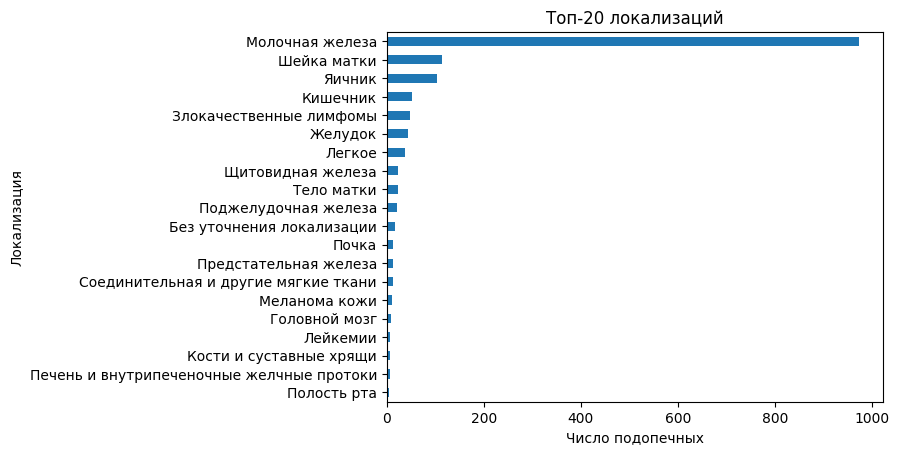

In [50]:
forms['diagnosis'].value_counts()[:20].sort_values().plot(kind='barh', 
                                                 title = 'Топ-20 локализаций', 
                                                 xlabel="Число подопечных", 
                                                 ylabel='Локализация');

**Выделим стадию заболевания из стоблца "new_name"**

In [51]:
# Создадим регулярное выражение для поиска римских цифр от I до IV.
# Ищем сначала 4, а потом 1, которая повторяется от 1 до 3 раз
pattern_1 = re.compile(r'(IV|I{1,3})')

# Функция для замены римских цифр на арабские
def replace_roman(match):
    return str(roman.fromRoman(match.group(0)))

In [52]:
pattern_2 = re.compile(r'(\d)\s*(?:стадия|ст)\b|\b(?:стадия|ст)\s*(\d)|\b(\d)(\D+|$)|(?:t|т|ршм)\s*(\d)',
                       re.IGNORECASE)

In [53]:
# Извлекаем цифры из каждой строки столбца
forms['grade'] = forms['new_name'].progress_apply(lambda x: re.sub(pattern_1, replace_roman, x))\
.apply(lambda x: re.search(pattern_2, x).group(1) or 
       re.search(pattern_2, x).group(2) or 
       re.search(pattern_2, x).group(3) or 
       re.search(pattern_2, x).group(5) 
       if re.search(pattern_2, x) 
       else 'Не указана').str.extract(r'([1-4])')
# forms['grade'] = forms['grade'].str.extract(pattern_2, expand=False)

100%|███████████████████████████████████| 1568/1568 [00:00<00:00, 301889.77it/s]


In [54]:
# Применяем регулярное выражение к столбцу 'new_name' и извлекаем первое совпадение
forms['grade'] = forms['new_name'].progress_apply(lambda x: re.sub(pattern_1, replace_roman, x))\
                                       .apply(lambda x: re.search(pattern_2, x).group(1) or 
                                                        re.search(pattern_2, x).group(2) or 
                                                        re.search(pattern_2, x).group(3) or 
                                                        re.search(pattern_2, x).group(5) 
                                                        if re.search(pattern_2, x) 
                                                        else 'Не указана')

100%|███████████████████████████████████| 1568/1568 [00:00<00:00, 303407.86it/s]


In [55]:
forms[['new_name', 'grade']].tail(60)
forms['grade'].unique()

array(['1', 'Не указана', '3', '2', '4', '5', '8', '0'], dtype=object)

In [56]:
# заменяем 5, 8 и 0 на "не указана"
forms.loc[forms['grade'] == '5', 'grade'] = 'Не указана'
forms.loc[forms['grade'] == '8', 'grade'] = 'Не указана'
forms.loc[forms['grade'] == '0', 'grade'] = 'Не указана'

In [57]:
forms['grade'].unique()

array(['1', 'Не указана', '3', '2', '4'], dtype=object)

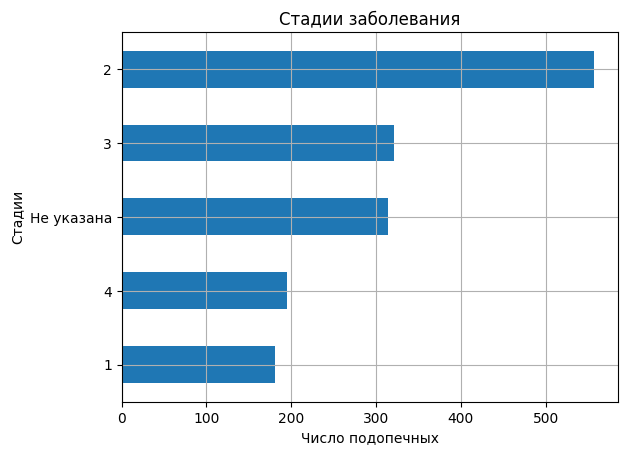

In [58]:
forms['grade'].value_counts().sort_values().plot(kind='barh', 
                                                 title = 'Стадии заболевания', 
                                                 xlabel="Число подопечных", 
                                                 ylabel='Стадии',
                                                 grid =True);

**Выделим кто заполнял анкету: за себя или за 3 лицо**

In [59]:
substring = ['мама', 'мамы', 'муж', 'супруг', 'доче', 'дочь', 'дочки', 'отец', 'отца', 
            'папы', 'папа', 'друг', 'сын', 'тетя', 'тети', 'болеет', 'сын', 'внук', 'сестр', 'брат']

In [60]:
# Функция для проверки вхождения всех подстрок
def check_substring(row):
    for sub in substring:
        if sub in row:
            return "за 3е лицо"
    return "за себя"

forms['applicant'] = forms['new_name'].apply(check_substring)

In [61]:
forms['applicant'].value_counts()

applicant
за себя       1496
за 3е лицо      72
Name: count, dtype: int64

**Определяем вид помощи, работаем со столбцом "Помощь"**

In [62]:
forms['Помощь'].value_counts().to_frame()

,count
Помощь,
Не указано,788
Психологическую,48
Общение,22
Психологическая,20
Информационную,18
...,...
Я супруга онкобольного,1
Совет как попасть в МНИЦ гематологии или,1
На лечение маме в Москве лечение стоит 1025000,1


In [63]:
#Составляем словарь вручную - проверяем, как заявители указывали тот или иной вид помощи в анкете
help_dict = {
    'Не указано': ['не указано'],
    'Материальная' : ['денеж', 'материал', 'подар', 'такси', 'оплат', 'гуманитар', 'стоит', 
                      'трансфер', 'прожив', 'дорог', 'медикаме', 'реконструк', 'финанс', 'получи', 
                      'терапи', 'жиль', 'обследов', 'бель', 'протез', 'рукав', 'билет', 'бюст', '300'],
    'Юридическая' : ['юридич', 'юрист', 'инвалиднос'],
    'Психологическая' : ['психол', 'эмоц', 'тревож', 'общен', 'морал', 'досуг', 'общат', 'страх', 
                         'страш', 'говор', 'позитив', 'поддерж', 'реабилит', 'разобрат', 'переключит'],
    'Информационная' : ['консульт', 'инфо', 'совет', 'маршрут', 'обмен опыт', 'где', 'ормац', 'рекомендац',
                        'медицин', 'как ', 'что', 'мнени', 'вариант', 'новост', 'узна', 'знан', 'вопрос',
                        'врач', 'доктор', 'когда', 'можно', 'контакт', 'грамот', 'найти', 'про ', 'лимфо',
                        'эндокрин'],
    'Участие в мероприятиях': ['мероприят', 'очны', 'очно', 'встреч', 'нейрограф', 'йог', 'бассейн',
                               'танц', 'стилист', 'фото'],
    'Любая' : ['любая', 'любую', 'всесторон', 'всяк', 'любой', 'разн', 'всю']
    }

In [64]:
new_column_values = []

# Проходим по каждому элементу столбца
for value in forms['Помощь']:
    # Приводим значение к строковому типу
    cleaned_value = str(value).strip().lower()
    # Проверяем вхождение хотя бы одной подстроки из словаря в строку
    if any(substring in cleaned_value 
           for substring_list in help_dict.values() 
           for substring in substring_list):
        # Если есть совпадение, добавляем соответствующий ключ в список
        new_column_values.append(next((key for key, value_list in help_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # Если совпадений нет
        new_column_values.append('Другая')

# Создаем новый столбец в датафрейме и заполняем его значениями из списка
forms['help'] = new_column_values

In [65]:
forms[['Помощь','help']].head(10)

,Помощь,help
0,Информационную,Информационная
1,Не указано,Не указано
2,"Денежную. На лучевую ехать в другой город. Жилье, дорога, еда все за свой счет.В Хантах я пробуду месяц. Помогите пожалуйста.",Материальная
3,"Уверенность и избавиться от страхов , полезную информацию.",Психологическая
4,Не указано,Не указано
5,Танцы,Участие в мероприятиях
6,Хочу получить лечение химиотерапии в институте имени Герцена в Москве,Материальная
7,Не указано,Не указано
8,Не указано,Не указано
9,Не указано,Не указано


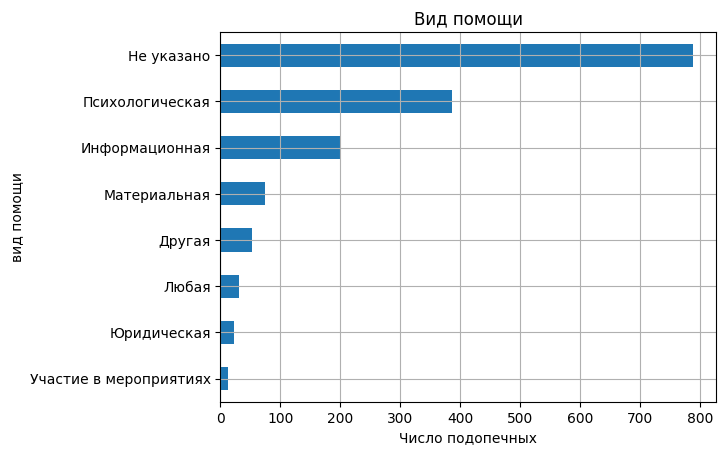

In [66]:
forms['help'].value_counts().sort_values().plot(kind='barh', 
                                           title = 'Вид помощи', 
                                           xlabel='Число подопечных', 
                                           ylabel='вид помощи', 
                                           grid = True);

**Определим сферу деятельности подопечных, работаем со столбцом "Сфера деятельности"**

In [67]:
sorted(forms['Сфера деятельности'].unique())

['-',
 '---',
 '3д художник',
 'Avon',
 'Digital, графический дизайн',
 'HR',
 'Hr',
 'IT технологии',
 'It специалист',
 'PR, маркетинг',
 '_',
 'Автосалон',
 'Агент по недвижимости',
 'Адвокат',
 'Администратор',
 'Администратор в пол- ке',
 'Администратор гостиницы',
 'Аккаунт Менеджер',
 'Активная, спортивная , позитивная',
 'Акушерка',
 'Акушерство',
 'Аналитик',
 'Архив',
 'Архивариус',
 'Архитектор на пенсии',
 'Ателье',
 'Аэропорт',
 'Бабушка',
 'Банк',
 'Банковская сфера',
 'Банковский работник',
 'Банковский служащий',
 'Банковский сотрудник',
 'Банковское дело',
 'Без работная.',
 'Без работы',
 'Безработная',
 'Безработная на данный момент',
 'Безработный',
 'Безроботная',
 'Библиотекарь',
 'Биолог',
 'Блогер писатель и поэт',
 'Блогер. Визажист',
 'Бузгалтерский учет',
 'Бухгалтер',
 'Бухгалтер ТСЖ',
 'Бухгалтер, стилист',
 'Бухгалтер, экономист',
 'Бухгалтер-калькулятор',
 'Бухгалтерия',
 'Бухгалтерия, торговля',
 'Бухгалтерия, финансы',
 'Бухгалтерские услуги',
 'Бухучет

In [68]:
# создадим словарь значений 
area_dict  = {
'IT, компьютеры, интернет': ['it', 'ит ', 'веб', 'web', 'програм', 'аналитик', 'ит'],
 'Администрация, руководство среднего звена': ['инспект', 'администр', 'начальник'],
 'Бухгалтерия, аудит': ['бухгалтер', 'экономи', 'галтер', 'бух', 'учет', 'ревиз'],
 'Гостинично-ресторанный бизнес, туризм': ['тури', 'гид', 'гостин', 'пекар', 'кофе', 'кафе', 'ресторан', 
                                           'официан','общепит',  'кулинар', 'повар', 'кондит', 'пище', 
                                           'питани', 'десерт', 'пряни', 'сыровар'],
 'Государственная и муниципальная служба': ['служа', 'воен', 'министе', 'гос', 'служб', 'полиц', 'чинов', 
                                            'войск', 'воин'],
 'Дизайн, творчество': ['дизайн', 'видео', 'design', 'графи', 'украш', 'иллюстр', 'худож', 'вязан', 
                        'организ', 'творч', 'вяжу', 'фото'],
 'Инженерные специальности': ['конструкт', 'инженер', 'проектир'],
 'Красота, фитнес, спорт': ['красот', 'тренер', 'космет', 'шугар', 'массаж', 'макия', 'стил', 'визаж', 
                            'ресниц', 'волос', 'бьюти', 'перманент', 'маник', 'парик', 'ногт', 'педикю',
                            'мейк', 'брови','спорт', 'тренаж', 'йог', 'депил'],
 'Культура, музыка, шоу-бизнес': ['культур',  'певч', 'пою', 'мод', 'блог', 'развле', 'ивент', 'режиссер', 
                                  'музыка'],
 'Логистика, склад, ВЭД': ['вэд', 'внешнеэк', 'логист', 'клад'],
 'Маркетинг, реклама, PR': ['маркет', 'pr', 'реклам'],
 'Медицина, фармацевтика': ['медиц', 'медсестра', 'здравоох', 'терап','фельдшер', 'акуш', 'врач', 'доктор', 
                            'фармац', 'подолог', 'стоматол', 'педиат', 'иатр', 'мед', 'санитар', 'провизор', 
                            'м/с'],
 'На пенсии': ['пенси', 'бабуш'],
 'Не работаю': ['неработ', 'безработ', 'не работ', 'многодет', 'декрет', 'отпуск', 'без работ', 'дома', 
                'домо', 'инвалид', 'безробот', 'д/х', 'мама'],
 'Недвижимость': ['риэлт', 'недвиж', 'оценщик'],
 'Образование, наука': ['образов', 'школ', 'логоп', 'дефект', 'педагог', 'учит', 'воспит', 'методи', 'детск',
                        'детьми', 'библиотек', 'препод', 'репетит', 'обучен'],
 'Охрана, безопасность': ['охранн', 'охрана', 'безопас'],
 'Предприниматель, самозанятый': ['предприн', 'avon', 'сетев', 'фриланс', 'оконный бизнес', 'индив', 'самоз',
                                  'ип'],
 'Продажи, закупки': ['продаж', 'закуп','представит', 'снабжен'],
 'Рабочие специальности, производство': ['оператор', 'дезинфек', 'газ', 'техник',  'механик', 'столяр', 
                                         'лабора', 'энергет', 'машиностроит', 'промыш', 'укладчик', 'ремонт', 
                                         'производство', 'кузнец', 'техни', 'отделка', 'геммолог', 'технол'],
 'Розничная торговля': ['торгов', 'розни','опто', 'таворовед', 'кассир', 'товаровед', 'магазин', 'продове',
                        'продав'],
 'СМИ, издательство, полиграфия': ['филолог', 'текст', 'лингв', 'писат', 'полиграфия', 'журнал'],
 'Секретариат, делопроизводство, АХО': ['1с', 'менедж',  'архив', 'секретар', 'офис', 'делопроиз', 'хозяйствен'],
 'Сельское хозяйство, агробизнес, животные': ['ферм', 'хозяйство', 'сельск', 'животн', 'ветерин', 'зоо', 
                                              'грум', 'птиц', 'биолог', 'эколог', 'заводчик', 'растиниевод', 
                                              'садовод'],
 'Страхование': ['страхов'],
 'Строительство, архитектура, ЖКХ': ['строител',  'жкх', 'архит'],
 'Сфера обслуживания': ['переводчик', 'консульт', 'консалтинг', 'водит', 'коуч', 'швея', 'швей', 'крой', 
                        'ателье', 'обслуж', 'услуг', 'чист', 'колл', 'сантех', 'психо', 'бизнес тренер', 
                        'соц', 'флорист', 'уборщ'],
 'Телекоммуникации и связь': ['диспетч', 'коммуника', 'телеком', 'связ', 'телефон', 'коммуналь'],
 'Топ-менеджмент, руководство высшего звена': ['управленец', 'руковод', 'владе', 'директ'],
 'Транспорт, автобизнес': ['азс', 'аэропорт', 'машинист', 'жд', 'дорог', 'дорож', 'транспорт', 'авто', 
                           'кондуктор', 'авиа'],
 'Управление персоналом': ['кадр', 'hr', 'рекрут'],
 'Учащийся, студент': ['студент', 'учусь', 'учащ'],
 'Финансы, банки': ['фин', 'банк'],
 'Юриспруденция': ['юри', 'адвок']}

In [69]:
new_column = []

# Проходим по каждому элементу столбца
for values in forms['Сфера деятельности']:
    # Приводим значение к строковому типу
    cleaned_value = str(values).strip().lower()
    # Проверяем вхождение хотя бы одной подстроки из словаря в строку
    if any(substring in cleaned_value 
           for substring_list in area_dict.values() 
           for substring in substring_list):
        # Если есть совпадение, добавляем соответствующий ключ в список
        new_column.append(next((key for key, value_list in area_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # Если совпадений нет
        new_column.append('Другая')

# Создаем новый столбец в датафрейме и заполняем его значениями из списка
forms['activity'] = new_column

In [70]:
forms[['Сфера деятельности', 'activity']].head(10)

,Сфера деятельности,activity
0,Бухгалтер,"Бухгалтерия, аудит"
1,Медицина,"Медицина, фармацевтика"
2,Пенсионер инвалид 3 гр,На пенсии
3,Медицина,"Медицина, фармацевтика"
4,Менеджер по туризму,"Гостинично-ресторанный бизнес, туризм"
5,Многодетная мать),Не работаю
6,Медицина,"Медицина, фармацевтика"
7,Бухгалтер,"Бухгалтерия, аудит"
8,Учитель,"IT, компьютеры, интернет"
9,"Сетевик, бухгалтер","Бухгалтерия, аудит"


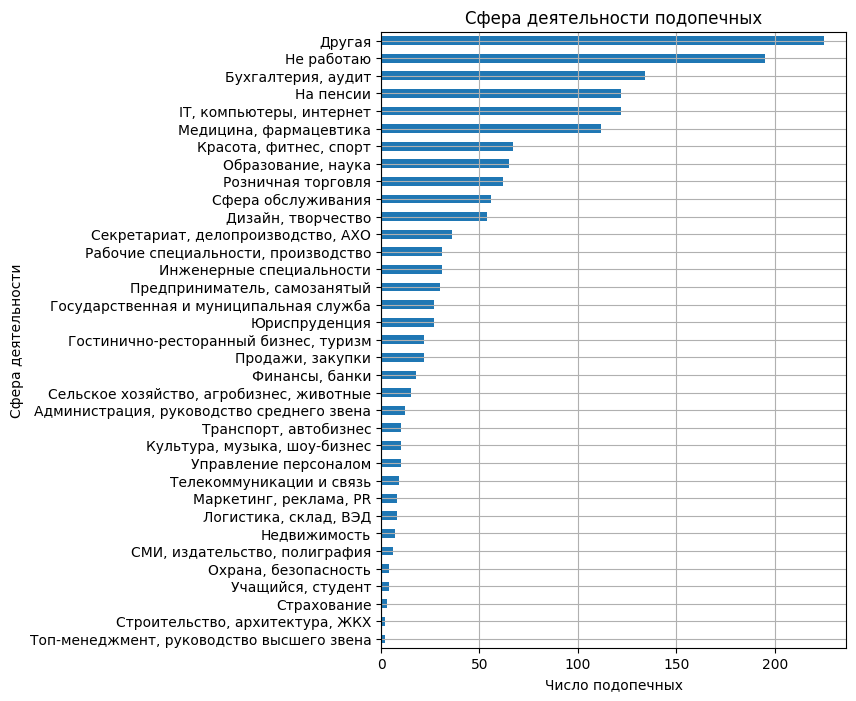

In [71]:
forms['activity'].value_counts().sort_values().plot(kind='barh', 
                                                title = 'Сфера деятельности подопечных', 
                                                xlabel='Число подопечных', 
                                                ylabel='Сфера деятельности', 
                                                grid = True,
                                                figsize=(6, 8));

**Выделим этапы лечения, работаем со столбцом "Этап лечения"**

In [72]:
# загрузим этапы лечений из справочника
stage = pd.read_excel('/Users/daria/Documents/venv/Справочники для проекта Рак Победим.xlsx', 
                      sheet_name= 'Этап лечения')
stages = stage['Этап лечения'].to_list()
stages

['Постановка диагноза',
 'Хирургическое лечение',
 'Химиотерапия',
 'Лучевая терапия',
 'Гормональная терапия',
 'Иммунотерапия',
 'Таргетная терапия',
 'Реабилитация',
 'Ремиссия',
 'Рецидив']

In [73]:
# переведем лист в ключи словаря
stage_dict = dict.fromkeys(stages)
stage_dict

{'Постановка диагноза': None,
 'Хирургическое лечение': None,
 'Химиотерапия': None,
 'Лучевая терапия': None,
 'Гормональная терапия': None,
 'Иммунотерапия': None,
 'Таргетная терапия': None,
 'Реабилитация': None,
 'Ремиссия': None,
 'Рецидив': None}

In [74]:
# пропишем подстроки значений для ключей словаря
values_for_keys = [
    ['диагноз', 'обслед', 'только', 'кт', 'не назн', 'не нач', 'нач', 'пока не'],
    ['хирургич', 'опера'],
    ['хим', 'хт'],
    ['лучев'],
    ['горм'],
    ['иммун', 'имун', 'укол', 'табл'],
    ['таргет'],
    ['реабилит'],
    ['здоров', 'рем'],
    ['рец']
]

stage_dict = {stage: values for stage, values in zip(stages, values_for_keys)}

In [75]:
stage_dict

{'Постановка диагноза': ['диагноз',
  'обслед',
  'только',
  'кт',
  'не назн',
  'не нач',
  'нач',
  'пока не'],
 'Хирургическое лечение': ['хирургич', 'опера'],
 'Химиотерапия': ['хим', 'хт'],
 'Лучевая терапия': ['лучев'],
 'Гормональная терапия': ['горм'],
 'Иммунотерапия': ['иммун', 'имун', 'укол', 'табл'],
 'Таргетная терапия': ['таргет'],
 'Реабилитация': ['реабилит'],
 'Ремиссия': ['здоров', 'рем'],
 'Рецидив': ['рец']}

In [76]:
new_columnss = []

# Проходим по каждому элементу столбца
for values in forms['Этап']:
    # Приводим значение к строковому типу
    cleaned_value = str(values).strip().lower()
    # Проверяем вхождение хотя бы одной подстроки из словаря в строку
    if any(substring in cleaned_value 
           for substring_list in stage_dict.values() 
           for substring in substring_list):
        # Если есть совпадение, добавляем соответствующий ключ в список
        new_columnss.append(next((key for key, value_list in stage_dict.items() 
                                       if any(substring in cleaned_value for substring in value_list)), None))
    else:
        # Если совпадений нет
        new_columnss.append('Другая')

# Создаем новый столбец в датафрейме и заполняем его значениями из списка
forms['steps'] = new_columnss

In [77]:
forms[['Этап','steps']].head(10)

,Этап,steps
0,Ремиссия,Ремиссия
1,Ещё не начала лечение,Постановка диагноза
2,Лучевая терапия,Лучевая терапия
3,Принимаю гармон и прохожу раз в год полное обследования,Постановка диагноза
4,Гормонотерапия,Гормональная терапия
5,Таргетная терапия до февраля,Таргетная терапия
6,После операции,Хирургическое лечение
7,Химиотерапия,Химиотерапия
8,Ремиссия,Ремиссия
9,"После операции, таргетная терапия",Хирургическое лечение


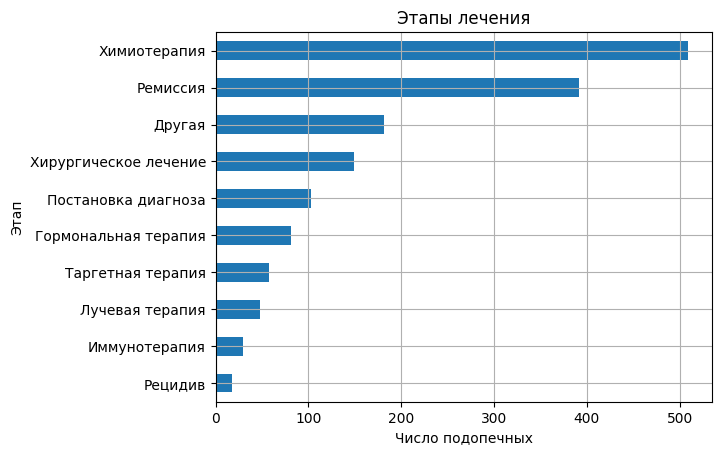

In [78]:
forms['steps'].value_counts().sort_values().plot(
                                                kind='barh', 
                                                title = 'Этапы лечения', 
                                                xlabel='Число подопечных', 
                                                ylabel='Этап', 
                                                grid = True);

In [79]:
# Итоговой датафрейм 
forms.head()

,ФИО,Email,Телефон,Дата рождения,Город,Сфера деятельности,Диагноз,Этап,Помощь,Группы,...,city,city_score,diagnosis,diagnosis_score,new_name,grade,applicant,help,activity,steps
0,User_01_01,Email_0001,tel_number_0001,1969-11-15,Краснодар,Бухгалтер,"РМЖ, 1с стадия",Ремиссия,Информационную,Клуб “Рак Победим”,...,Краснодар,100,Молочная железа,100,"РМЖ, 1с стадия",1,за себя,Информационная,"Бухгалтерия, аудит",Ремиссия
1,User_01_02,Email_0002,tel_number_0002,1982-08-20,г. Пушкин Санкт-Петербург,Медицина,Мальт лимфома желудка,Ещё не начала лечение,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”; Анонсы организации; Дари Эмоции,...,Санкт-Петербург,90,Желудок,100,Мальт лимфома желудка,Не указана,за себя,Не указано,"Медицина, фармацевтика",Постановка диагноза
2,User_01_03,Email_0003,tel_number_0003,1976-06-09,Сургут ХМАО,Пенсионер инвалид 3 гр,Рак шейки матки 3 С стадии,Лучевая терапия,"Денежную. На лучевую ехать в другой город. Жилье, дорога, еда все за свой счет.В Хантах я пробуду месяц. Помогите пожалуйста.",Клуб “Рак Победим”,...,Сургут,90,Шейка матки,100,шейки матки 3 С стадии,3,за себя,Материальная,На пенсии,Лучевая терапия
3,User_01_04,Email_0004,tel_number_0004,1960-12-19,Ростов-на-Дону,Медицина,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",Принимаю гармон и прохожу раз в год полное обследования,"Уверенность и избавиться от страхов , полезную информацию.",#ЛовлюЭмоции; Клуб “Рак Победим”; Дари Эмоции,...,Ростов-на-Дону,100,Молочная железа,100,"РМЖ, 1-ая, сделала оперативно 2 года и 9 месяцев назад",1,за себя,Психологическая,"Медицина, фармацевтика",Постановка диагноза
4,User_01_05,Email_0005,tel_number_0005,1967-07-09,Нижний Новгород,Менеджер по туризму,"РМЖ, 2 а",Гормонотерапия,Не указано,#ЛовлюЭмоции; Клуб “Рак Победим”,...,Нижний Новгород,100,Молочная железа,100,"РМЖ, 2 а",2,за себя,Не указано,"Гостинично-ресторанный бизнес, туризм",Гормональная терапия


In [80]:
# сохраняем готовый датафрейм в директорию
forms.to_csv('/Users/daria/Documents/venv/forms.csv', index=False)